# OLS Regression - Simple Train and Test

## Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import os

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Notbook Settings

In [2]:
# set working directory
os.chdir(".")

# make sure it is set right
print(os.getcwd())

# make sure plots display in notebook
%matplotlib inline

/Users/andrewworsley/projects/itds/code


## Data Load

Weekly marketing spend (in thousand's) by channel and the corresponding product sales (in million's).

In [3]:
# read in the advertising data set
ad_df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = [0])

# look at the top rows
ad_df.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

## EDA

In [4]:
# describe the dataset
ad_df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
# look at the data types
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


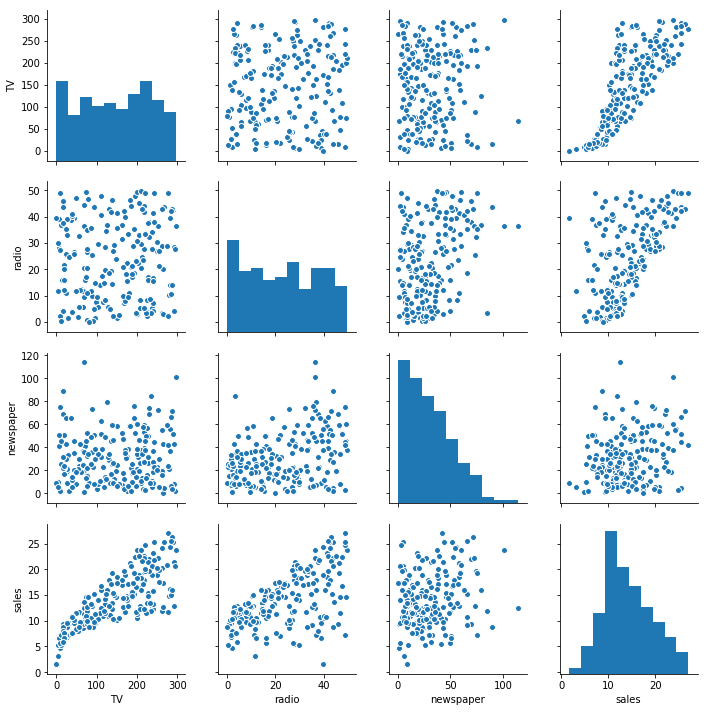

In [6]:
sns.pairplot(ad_df)

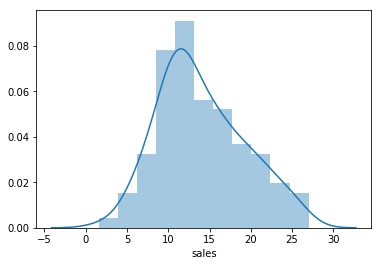

In [7]:
sns.distplot(ad_df["sales"])

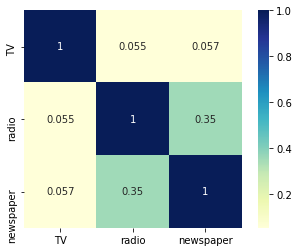

In [8]:
sns.heatmap(ad_df.drop(columns = "sales").corr(), annot=True, cmap="YlGnBu", square = True)

## Training - Model 1

In [9]:
# specifying the regression model
ols_m1 = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split

# feature set
X = ad_df.drop(columns = "sales")

# target
y = ad_df["sales"]

# creating training / testings datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [10]:
print(len(X_train))
print(len(X_test))

134
66


In [11]:
# fit the regression model
ols_m1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Assumption Checking

Errors should be independently and identically normally distributed with a mean of 0 and a fixed variance.

### Residuals vs. Fitted Values

In [12]:
# residuals versus fitted values
def plot_fit(fitted_values, residuals):
    plt.scatter(fitted_values, residuals)
    plt.axhline(y = 0, color = "r")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")

In [13]:
residuals = ols_m1.predict(X_train) - y_train

fitted_values = ols_m1.predict(X_train)

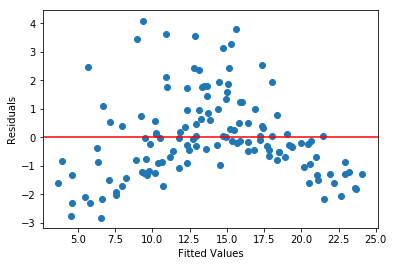

In [14]:
# call
plot_fit(fitted_values, residuals)

### Distribution of Residuals

In [15]:
# plot of residuals
def plot_residuals(residuals):
    residuals.name = "Residuals"
    sns.distplot(residuals)

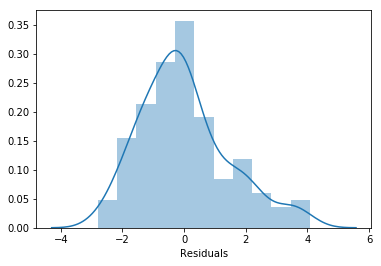

In [16]:
# call
plot_residuals(residuals)

## Training - Model 2

### Remove High Influence Point?

In [17]:
X_train = X_train[residuals != residuals.max()]

y_train = y_train[residuals != residuals.max()]

In [18]:
# specifying the regression model
ols_m2 = linear_model.LinearRegression()

# fit the regression model
ols_m2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Assumption Checking

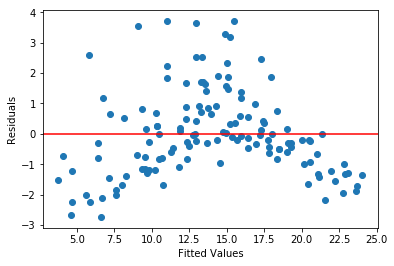

In [19]:
residuals = ols_m2.predict(X_train) - y_train

fitted_values = ols_m2.predict(X_train)

plot_fit(fitted_values, residuals)

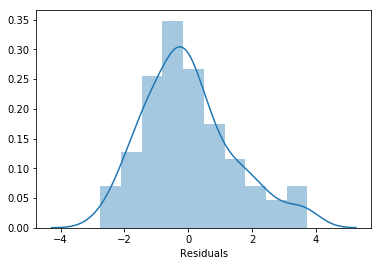

In [20]:
plot_residuals(residuals)

## Hypothesis Testing

In [21]:
# use statsmodels
olssm_m2 = sm.OLS(y_train, X_train).fit()

# print summary
olssm_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2632.
Date:                Fri, 28 Sep 2018   Prob (F-statistic):          3.76e-116
Time:                        12:33:22   Log-Likelihood:                -274.22
No. Observations:                 133   AIC:                             554.4
Df Residuals:                     130   BIC:                             563.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0519      0.002     31.446      0.000       0.049       0.055
radio          0.2382      0.011     21.523      0.000       0.216       0.260
newspaper      0.0154      0.008      1.993      0.048       0.000       0.031
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                4.077
Skew:                           0.427   Prob(JB):                        0.130
Kurtosis:                       2.920   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training - Model 3

### Drop Newspaper

In [22]:
X_train_clean = X_train.drop(columns = ["newspaper"])
X_test_clean = X_test.drop(columns = ["newspaper"])

In [23]:
# specifying the regression model
ols_m3 = linear_model.LinearRegression()

# fit the regression model
ols_m3.fit(X_train_clean,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Assumption Checking

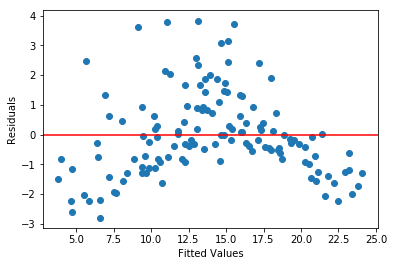

In [24]:
residuals = ols_m3.predict(X_train_clean) - y_train

fitted_values = ols_m3.predict(X_train_clean)

plot_fit(fitted_values, residuals)

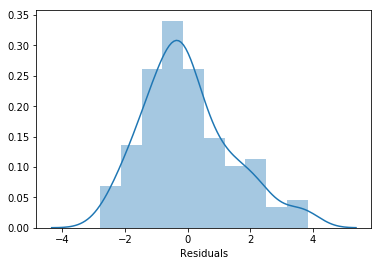

In [25]:
plot_residuals(residuals)

## Final Model Interpretation

### Feature Importance?

In [26]:
for estimate in zip(X_train.columns, ols_m1.coef_):
     print("Fit 1 estimate: ", estimate)

for estimate in zip(X_train.columns, ols_m2.coef_):
     print("Fit 2 estimate: ", estimate)
        
for estimate in zip(X_train_clean.columns, ols_m3.coef_):
     print("Fit 3 estimate: ", estimate)

Fit 1 estimate:  ('TV', 0.043654073038586795)
Fit 1 estimate:  ('radio', 0.20170856777313367)
Fit 1 estimate:  ('newspaper', -0.004787026362382825)
Fit 2 estimate:  ('TV', 0.04305188174921734)
Fit 2 estimate:  ('radio', 0.20395293280135535)
Fit 2 estimate:  ('newspaper', -0.006513563030333825)
Fit 3 estimate:  ('TV', 0.04288613570739583)
Fit 3 estimate:  ('radio', 0.20085317606752448)


### Intercept?

In [27]:
print(ols_m1.intercept_)
print(ols_m2.intercept_)
print(ols_m3.intercept_)

3.1665911082618674
3.2905425459918263
3.1735258067242285


## Testing

In [28]:
# predicted
predicted_m1 = ols_m1.predict(X_test)
predicted_m2 = ols_m2.predict(X_test)
predicted_m3 = ols_m3.predict(X_test_clean)

# actual
validate = pd.DataFrame(y_test)

validate.columns = ['actual']

validate['m1'] = predicted_m1
validate['m2'] = predicted_m2
validate['m3'] = predicted_m3

validate.head(10)

actual         m1         m2         m3
97     11.7  12.470372  12.473000  12.350812
6       7.2  13.050904  13.149875  13.368355
117    12.2  12.005123  12.033144  12.015476
36     12.8  16.643146  16.586566  16.464023
184    26.2  24.051262  23.974566  24.144265
161    14.4  14.200882  14.208574  14.206827
55     20.2  20.367609  20.370551  20.224285
135    10.8  12.249348  12.324450  12.508957
91     11.2   9.973186  10.011203   9.917314
192     9.9   8.612204   8.704570   8.580643

## Accuracy?

In [29]:
# mean squared error
def mse(df, model):
    mse = np.sum((validate['actual'] - validate[model])**2) / len(validate)
    print("The " + model + " Mean Squared Error is " + str(mse))
    
models = ["m1", "m2", "m3"]

for model in models:
    mse(validate, model)

# sklearn mse
# mean_squared_error(predicted, y_test)

The m1 Mean Squared Error is 4.42053570447149
The m2 Mean Squared Error is 4.540581501206879
The m3 Mean Squared Error is 4.493106743057753


## Next Steps

Can you spot any ways to improve the model? Is the OLS linear model appropriate here? Why do you think the R-squared value actually gets worse in model 2? Hint: Check the assumptions!!!
What about p-values???

## References

Data sourced from An Introduction to Statistical Learning
with Applications in R
Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.